In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Iris.xlsx')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
print(data.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [9]:
# Count the unique values in the "species" column
print(data["species"].value_counts())


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [11]:
# Check for missing values
print(data.isnull().sum())

# Summary of the dataset
print(data.describe())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


<Axes: >

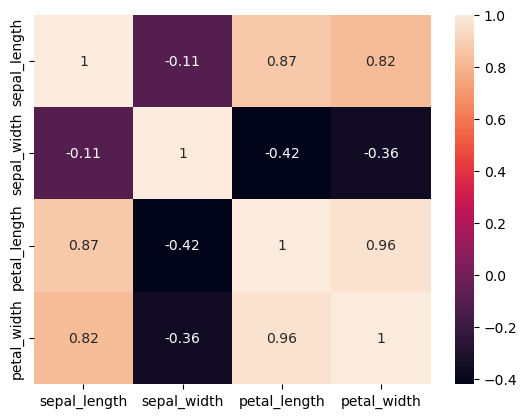

In [12]:
sns.heatmap(data.drop('species', axis=1).corr(), annot=True)

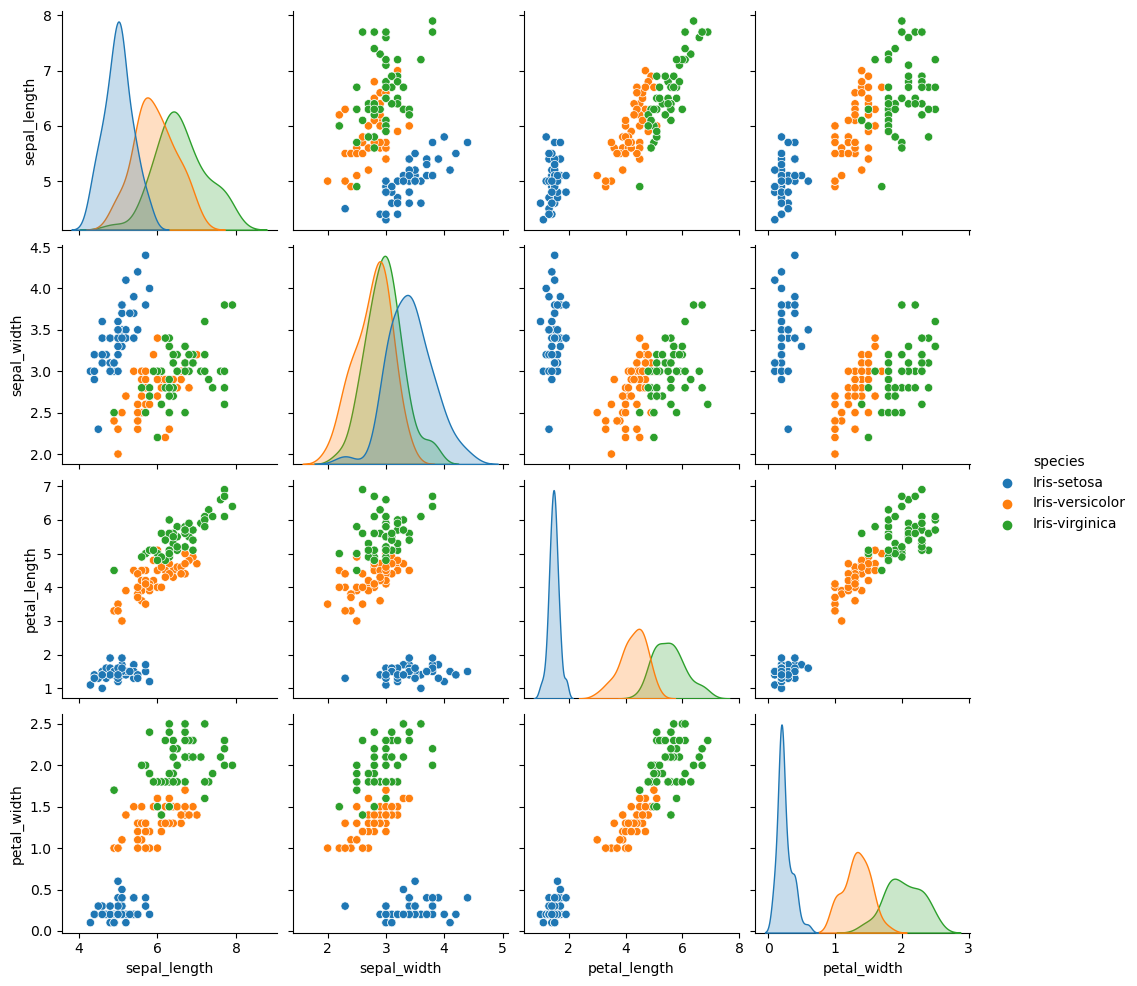

In [14]:
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(data, hue='species')

This shows that setosa is the most separable class

### Graphs for Individual Features Using Boxplot:
Boxplots are used to visualize the distribution of each feature across species, highlighting differences in spread, median, and potential outliers.


Text(0.5, 1.0, 'Boxplot of Sepal Length by Species')

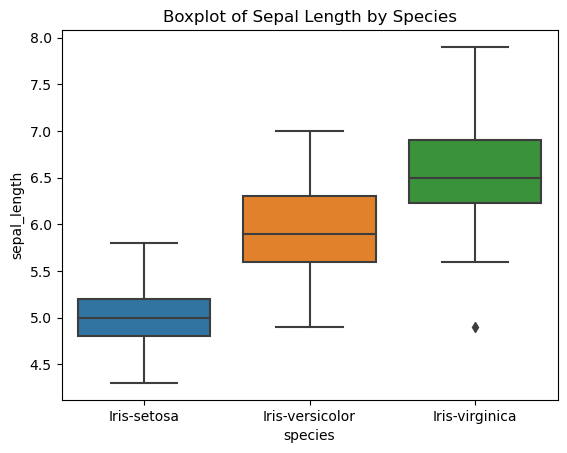

In [15]:
# Create a boxplot for Sepal Length across Species
sns.boxplot(x="species", y="sepal_length", data=data)

# Set the title for the plot
plt.title('Boxplot of Sepal Length by Species')

Text(0.5, 1.0, 'Boxplot of Petal Length by Species')

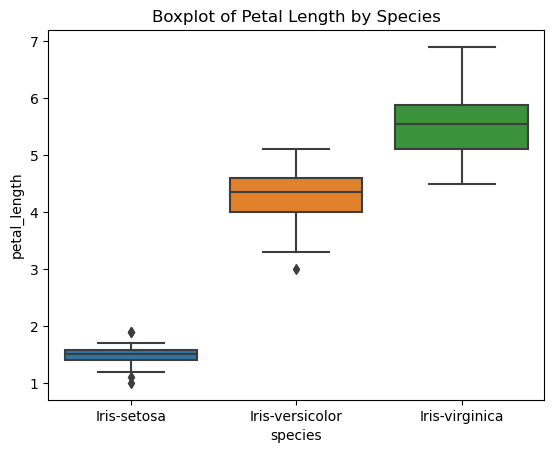

In [16]:
# Create a boxplot for Petal Length across Species
sns.boxplot(x="species", y="petal_length", data=data)

# Set the title for the plot
plt.title('Boxplot of Petal Length by Species')

Text(0.5, 1.0, 'Boxplot of Petal Width by Species')

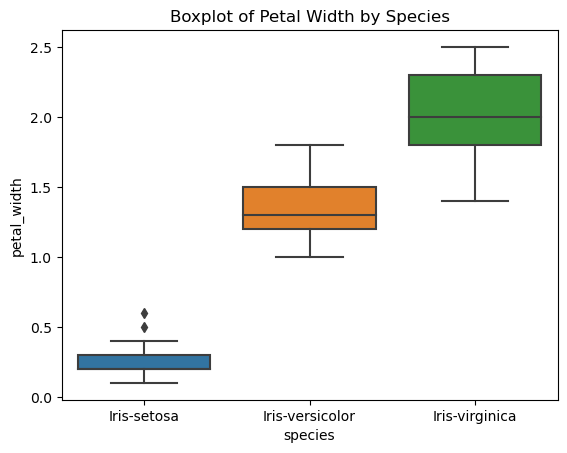

In [17]:
# Create a boxplot for Petal Width across Species
sns.boxplot(x="species", y="petal_width", data=data)

# Set the title for the plot
plt.title('Boxplot of Petal Width by Species')

### Observation:
It can be seen that **Setosa** has a larger **sepal width**, while **Virginica** shows larger measurements for other features such as **sepal length**, **petal length**, and **petal width**.


In [18]:
# import necessary libraries
from sklearn.model_selection import train_test_split

In [19]:

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(data.drop('species', axis=1), 
                                                    data['species'], 
                                                    test_size=0.30, 
                                                    random_state=101)

In [20]:
# import necessary libraries
from sklearn.linear_model import LogisticRegression

In [21]:
# Instantiate the Logistic Regression model
logmodel = LogisticRegression(max_iter=200)

# Train the model using the training data
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [22]:
predictions = logmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



Accuracy: 0.9777777777777777


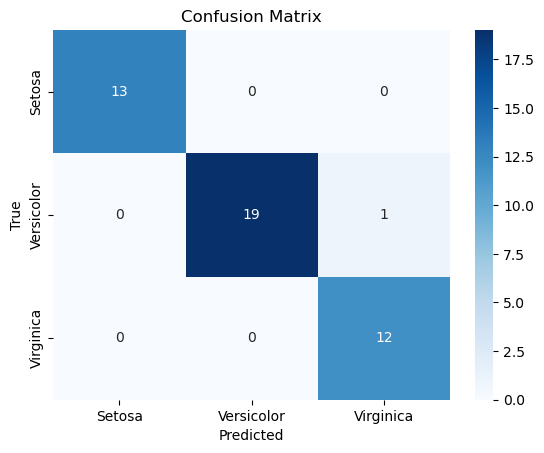

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()